<div style="text-align: right"> Update date: Nov 2, 2023 </div><br>

## **Real estate market analysis in México City** <br>
The data comes from public information collected from the Airbnb web-site  including:
detailed listings data, detailed calendar data, summary information and metrics for listings in Mexico City, summary review data and listing ID, neighbourhood list for geo filter, GeoJSON file of neighbourhoods of the city.
<br><br>
Source: Inside Airbnb .  The original  data source is available [here](http://insideairbnb.com/get-the-data).
<br><br>

## Exploratory Data Analysis
### Objetive
<br>
Preparate the data that the sector leader Airbnb makes public to find the type of properties that have the greatest commercial potential for tourist rentals in Mexico City.<br><br>


### The general outline of this notebook is as follows
    1. Explore data source
    2. Select files
    3. Generate database
    4. Import data
    5. Perform data quality
    6. Generate analytical data mart
<br>

### Main work tools<br>

|Package|                           Version|
|:---------------------------------|--------:|
|matplotlib                        | 3.7.2|
|numpy                             | 1.25.2|
|notebook                          | 6.5.4|
|pandas                            | 2.1.1|
|python                            | 3.10.12|
|scipy                             | 1.11.3|
|seaborn                           | 0.12.2|

## Import necessary libraries

In [2]:
import sys
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sqlalchemy as sa
sys.path.append(os.getcwd() + '/helperfunctions')
import airbnbfunctions
%matplotlib inline
%config IPCompleter.greedy=True
print('Imported libraries')

Imported libraries


## Explore data source

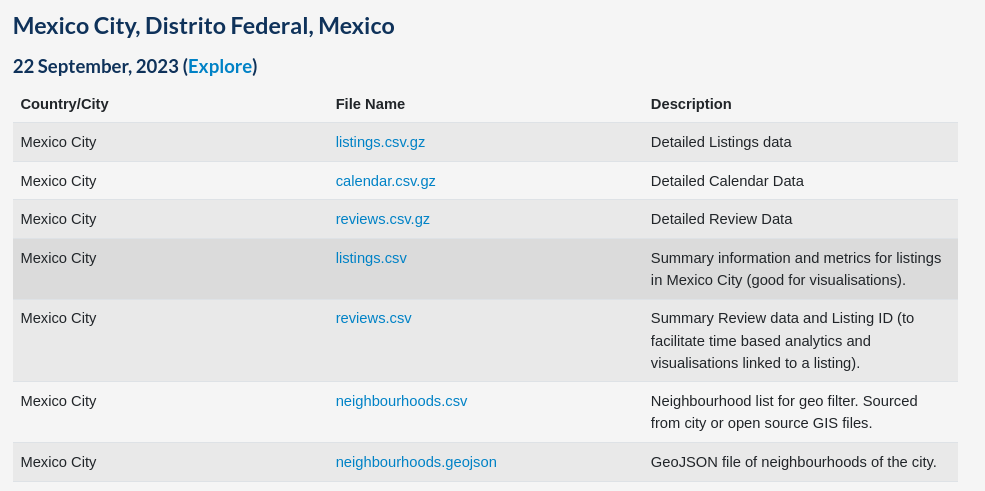

In [2]:
from IPython import display
display.Image("media/airbnb_mexicocity_220923.png")

### First look listings summary

In [720]:
listings = pd.read_csv('data/listings.csv')
listings.rename(columns={'neighbourhood':'neighbourhood_group',
                         'neighbourhood_group':'neighbourhood'}, inplace=True)
listings.head()

,id,name,host_id,host_name,neighbourhood,neighbourhood_group,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,35797,Villa in Mexico City · 1 bedroom · 1 bed · 1 bath,153786,Dici,NaN,Cuajimalpa de Morelos,19.38283,-99.27178,Entire home/apt,3437,1,0,NaN,NaN,1,363,0,NaN
1,44616,Home in Mexico City · ★4.58 · 5 bedrooms · 8 b...,196253,Condesa Haus Bed & Breakfast CDMX,NaN,Cuauhtémoc,19.41162,-99.17794,Entire home/apt,18000,1,64,2023-03-26,0.44,13,358,5,NaN
2,61792,Home in Mexico City · ★4.92 · 1 bedroom · 1 be...,299558,Roberto,NaN,Cuauhtémoc,19.41083,-99.18057,Private room,1031,2,63,2023-08-27,0.88,2,180,5,NaN
3,67703,Rental unit in Mexico City · ★4.89 · 2 bedroom...,334451,Nicholas,NaN,Cuauhtémoc,19.41152,-99.16857,Entire home/apt,1890,4,47,2023-01-01,0.33,2,307,4,NaN
4,70644,Rental unit in Mexico City · ★4.91 · 1 bedroom...,212109,Trisha,NaN,Coyoacán,19.35448,-99.16217,Entire home/apt,737,5,120,2023-09-16,0.85,3,158,8,NaN


In [4]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26318 entries, 0 to 26317
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              26318 non-null  int64  
 1   name                            26318 non-null  object 
 2   host_id                         26318 non-null  int64  
 3   host_name                       26318 non-null  object 
 4   neighbourhood_group             0 non-null      float64
 5   neighbourhood                   26318 non-null  object 
 6   latitude                        26318 non-null  float64
 7   longitude                       26318 non-null  float64
 8   room_type                       26318 non-null  object 
 9   price                           26318 non-null  int64  
 10  minimum_nights                  26318 non-null  int64  
 11  number_of_reviews               26318 non-null  int64  
 12  last_review                     

### First look listings detailed

In [5]:
listings_detail = pd.read_csv('data/listings.csv.gz', compression='gzip')
listings_detail.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,35797,https://www.airbnb.com/rooms/35797,20230922223244,2023-09-23,city scrape,Villa in Mexico City · 1 bedroom · 1 bed · 1 bath,"Dentro de Villa un estudio de arte con futon, ...","Centro comercial Santa Fe, parque interlomas y...",https://a0.muscache.com/pictures/f395ab78-1185...,153786,...,NaN,NaN,NaN,NaN,f,1,1,0,0,NaN
1,611179,https://www.airbnb.com/rooms/611179,20230922223244,2023-09-23,city scrape,Condo in Mexico City · 1 bedroom · 2 beds · 1....,LOTS OF SPACE AND STYLE. ROMANTIC. <br />AMAZI...,"Mexico City's historic center, declared a Worl...",https://a0.muscache.com/pictures/7734976/9633d...,1297488,...,4.00,3.00,4.00,NaN,f,6,6,0,0,0.01
2,611337,https://www.airbnb.com/rooms/611337,20230922223244,2023-09-23,city scrape,Condo in Mexico City · ★5.0 · 2 bedrooms · 4 b...,IDEAL FOR 2 COUPLES OR 4 FRIENDS <br />LOTS O...,"Mexico City's historic center, declared a Worl...",https://a0.muscache.com/pictures/51547139/b996...,1297488,...,5.00,5.00,5.00,NaN,f,6,6,0,0,0.04
3,613181,https://www.airbnb.com/rooms/613181,20230922223244,2023-09-23,city scrape,Rental unit in Mexico City · ★4.76 · 2 bedroom...,"Couples history with comfort, playful elegance...",Casa Tezontle is in Mexico’s City Historic Dow...,https://a0.muscache.com/pictures/9084124/44864...,3040937,...,4.95,4.73,4.72,NaN,t,1,1,0,0,1.47
4,617137,https://www.airbnb.com/rooms/617137,20230922223244,2023-09-23,previous scrape,Rental unit in Mexico City · 1 bedroom · 1 bed...,<b>The space</b><br />All services. 2 rooms. 1...,NaN,https://a0.muscache.com/pictures/9187120/91a96...,3059169,...,NaN,NaN,NaN,NaN,f,1,0,0,1,NaN


In [6]:
listings_detail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26318 entries, 0 to 26317
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            26318 non-null  int64  
 1   listing_url                                   26318 non-null  object 
 2   scrape_id                                     26318 non-null  int64  
 3   last_scraped                                  26318 non-null  object 
 4   source                                        26318 non-null  object 
 5   name                                          26318 non-null  object 
 6   description                                   25389 non-null  object 
 7   neighborhood_overview                         16374 non-null  object 
 8   picture_url                                   26318 non-null  object 
 9   host_id                                       26318 non-null 

Conclusions: 

* The tables have the same record number, but the detail file has more columns.
* We could join them using the id column.

### First look review summary

In [7]:
review = pd.read_csv('data/reviews.csv')
review.head()

,listing_id,date
0,44616,2011-11-09
1,44616,2012-08-16
2,44616,2012-12-28
3,44616,2013-01-04
4,44616,2013-03-19


In [8]:
review.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 980909 entries, 0 to 980908
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   listing_id  980909 non-null  int64 
 1   date        980909 non-null  object
dtypes: int64(1), object(1)
memory usage: 15.0+ MB


### First look review detailed

In [9]:
review_detail = pd.read_csv('data/reviews.csv.gz', compression='gzip')
review_detail.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,44616,706908,2011-11-09,634733,Lindsay,Forget staying in a hotel. Stay at condesa hau...
1,44616,2006160,2012-08-16,3087087,Samuel,"Fantastic location, great place, friendly host..."
2,44616,3174954,2012-12-28,3234920,Anna,I would highly recommend Condesa Haus for anyo...
3,44616,3271579,2013-01-04,2199822,Shelley And Pall,Great stay. Thanks. Highly recommend.
4,44616,3841065,2013-03-19,2423825,Leonardo,This was not a very good experience I am afrai...


In [10]:
review_detail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 980909 entries, 0 to 980908
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   listing_id     980909 non-null  int64 
 1   id             980909 non-null  int64 
 2   date           980909 non-null  object
 3   reviewer_id    980909 non-null  int64 
 4   reviewer_name  980904 non-null  object
 5   comments       980789 non-null  object
dtypes: int64(3), object(3)
memory usage: 44.9+ MB


Conclusions: 

* The tables have the same record number, but the detail file has more columns.
* The information from the opinions does not help us with our objective, so we will not use these tables.

### First look calendar

In [11]:
calendar = pd.read_csv('data/calendar.csv.gz', compression='gzip')
calendar.head(100)

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,35797,2023-09-23,f,"$3,437.00","$3,437.00",1.0,7.0
1,35797,2023-09-24,f,"$3,437.00","$3,437.00",1.0,7.0
2,35797,2023-09-25,t,"$3,437.00","$3,437.00",1.0,7.0
3,35797,2023-09-26,t,"$3,437.00","$3,437.00",1.0,7.0
4,35797,2023-09-27,t,"$3,437.00","$3,437.00",1.0,7.0
...,...,...,...,...,...,...,...
95,35797,2023-12-27,t,"$3,437.00","$3,437.00",1.0,7.0
96,35797,2023-12-28,t,"$3,437.00","$3,437.00",1.0,7.0
97,35797,2023-12-29,t,"$3,437.00","$3,437.00",1.0,7.0
98,35797,2023-12-30,t,"$3,437.00","$3,437.00",1.0,7.0


In [12]:
calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9606197 entries, 0 to 9606196
Data columns (total 7 columns):
 #   Column          Dtype  
---  ------          -----  
 0   listing_id      int64  
 1   date            object 
 2   available       object 
 3   price           object 
 4   adjusted_price  object 
 5   minimum_nights  float64
 6   maximum_nights  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 513.0+ MB


Conclusions:
* The table apparently is a projection of the availability of reservations.
* It is not information that serves our objective.


### First look neighbourhoods

In [13]:
neighbourhoods = pd.read_csv('data/neighbourhoods.csv')
neighbourhoods.head()

,neighbourhood_group,neighbourhood
0,NaN,Álvaro Obregón
1,NaN,Azcapotzalco
2,NaN,Benito Juárez
3,NaN,Coyoacán
4,NaN,Cuajimalpa de Morelos


In [14]:
neighbourhoods.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   neighbourhood_group  0 non-null      float64
 1   neighbourhood        16 non-null     object 
dtypes: float64(1), object(1)
memory usage: 384.0+ bytes


Conclusions:
* It is a catalog with the 16 neighbourhood group of the Mexico City. Does not contain the neighborhoods.
* We will not use it, since the neighbourhood group information is incorporated into other tables.

### First look neighbourhoods geojson

In [15]:
neighbourhoods_geo = pd.read_json('data/neighbourhoods.geojson')
neighbourhoods_geo.head()

,type,features
0,FeatureCollection,"{'type': 'Feature', 'geometry': {'type': 'Mult..."
1,FeatureCollection,"{'type': 'Feature', 'geometry': {'type': 'Mult..."
2,FeatureCollection,"{'type': 'Feature', 'geometry': {'type': 'Mult..."
3,FeatureCollection,"{'type': 'Feature', 'geometry': {'type': 'Mult..."
4,FeatureCollection,"{'type': 'Feature', 'geometry': {'type': 'Mult..."


In [16]:
neighbourhoods_geo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   type      16 non-null     object
 1   features  16 non-null     object
dtypes: object(2)
memory usage: 384.0+ bytes


Conclusions:
* The table contains the geographical coordinates of the neighbourhood of the Mexico City.
* We will not use it, since we will use another option to generate maps.

## Select files

* Main tables we will use:
    * listings.csv
    * listings.csv.gz

## Generate database

In [17]:
con = sa.create_engine('sqlite:///data/airbnb_mx.db')
listings.to_sql('listings', con=con, if_exists='replace')
listings_detail.to_sql('listings_detail', con=con, if_exists='replace')
insp = sa.inspect(con)
insp.get_table_names()

['listings', 'listings_detail']

## Import data

### Internal data

In [3]:
con = sa.create_engine('sqlite:///data/airbnb_mx.db')
listings = pd.read_sql('listings', con=con)
listings_detail = pd.read_sql('listings_detail', con=con)
print(f'{listings.shape=}')
print(f'{listings_detail.shape=}')

listings.shape=(26318, 19)
listings_detail.shape=(26318, 76)


### External data

In our database we do not have the purchase price of a property, but it is one of the main levers to achieve our objective. On this [page](https://www.flat.mx/mapa-de-precios), we have just the information we need.

On the other hand, we had seen that we do not have the neighbourhoods located in each neighbourhood group. On the [site opendatasoft](https://public.opendatasoft.com/explore/dataset/georef-mexico-colonia/export/?disjunctive.sta_code&disjunctive.sta_name&disjunctive.mun_code&disjunctive.mun_name&disjunctive.col_code&disjunctive.col_name&sort=year) we have some of the information we need.

Therefore, we are going to look for that data externally.

Load prices per square meter

In [4]:
price_m2 = pd.read_csv('data/pricem2_flatmx.csv', sep='|')
price_m2.head()

,neighbourhood,price_m2
0,Álvaro Obregón,"$34,165"
1,Azcapotzalco,"$28,655"
2,Benito Juárez,"$40,631"
3,Coyoacán,"$33,101"
4,Cuajimalpa de Morelos,"$36,352"


Clean the price:
1. Remove currency sign
2. Remove comma from thousands separator
3. Changing to integer type

In [5]:
price_m2['price_m2'] =  price_m2.price_m2.str.split(expand=True)[0]\
    .str.replace('[$,]', '', regex=True).astype('int')
price_m2

,neighbourhood,price_m2
0,Álvaro Obregón,34165
1,Azcapotzalco,28655
2,Benito Juárez,40631
3,Coyoacán,33101
4,Cuajimalpa de Morelos,36352
5,Cuauhtémoc,34599
6,Gustavo A. Madero,24196
7,Iztacalco,27000
8,Iztapalapa,21171
9,La Magdalena Contreras,31998


Load the georeference of the neighbournhoods

In [6]:
import json
with open('data/georef-mexico-colonia.json') as f:
    colonia = json.load(f)
print(f'Number of neighbourhoods in Mexico City:{len(colonia)}')

Number of neighbourhoods in Mexico City:1837


Prepare the data source and conditions for loading into the dataframe neighbourhoods_geo.

In [7]:
neighbourhoods_geo = pd.json_normalize(colonia).loc[:,['mun_name','col_name',
                                     'geo_shape.geometry.coordinates']]
neighbourhoods_geo['col_name'] = neighbourhoods_geo.col_name.apply(lambda x: x[0])
neighbourhoods_geo['mun_name'] = neighbourhoods_geo.mun_name.apply(lambda x: x[0])
neighbourhoods_geo['polygon'] = neighbourhoods_geo['geo_shape.geometry.coordinates']\
    .map(lambda x: airbnbfunctions.generate_geopolygon(x))
neighbourhoods_geo.head()

,mun_name,col_name,geo_shape.geometry.coordinates,polygon
0,Azcapotzalco,Coltongo,"[[[-99.15595433, 19.48650577], [-99.15598639, ...","POLYGON ((-99.15595433 19.48650577, -99.155986..."
1,Coyoacán,Ampliacion Candelaria,"[[[-99.15264908, 19.32580855], [-99.15203371, ...","POLYGON ((-99.15264908 19.32580855, -99.152033..."
2,Coyoacán,Croc Culhuacan Secc 6 (U Hab),"[[[-99.1225099, 19.32903956], [-99.12256308, 1...","POLYGON ((-99.1225099 19.32903956, -99.1225630..."
3,Coyoacán,Los Cipreses,"[[[-99.12465651, 19.31520354], [-99.12453903, ...","POLYGON ((-99.12465650999999 19.31520354, -99...."
4,Cuajimalpa de Morelos,Lomas Del Chamizal,"[[[-99.26653664, 19.38314457], [-99.26632949, ...","POLYGON ((-99.26653664 19.38314457, -99.266329..."


## Perform data quality

### listings table

#### General view

In [8]:
listings.head()

,index,id,name,host_id,host_name,neighbourhood,neighbourhood_group,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,0,35797,Villa in Mexico City · 1 bedroom · 1 bed · 1 bath,153786,Dici,NaN,Cuajimalpa de Morelos,19.38283,-99.27178,Entire home/apt,3437,1,0,None,NaN,1,363,0,NaN
1,1,44616,Home in Mexico City · ★4.58 · 5 bedrooms · 8 b...,196253,Condesa Haus Bed & Breakfast CDMX,NaN,Cuauhtémoc,19.41162,-99.17794,Entire home/apt,18000,1,64,2023-03-26,0.44,13,358,5,NaN
2,2,61792,Home in Mexico City · ★4.92 · 1 bedroom · 1 be...,299558,Roberto,NaN,Cuauhtémoc,19.41083,-99.18057,Private room,1031,2,63,2023-08-27,0.88,2,180,5,NaN
3,3,67703,Rental unit in Mexico City · ★4.89 · 2 bedroom...,334451,Nicholas,NaN,Cuauhtémoc,19.41152,-99.16857,Entire home/apt,1890,4,47,2023-01-01,0.33,2,307,4,NaN
4,4,70644,Rental unit in Mexico City · ★4.91 · 1 bedroom...,212109,Trisha,NaN,Coyoacán,19.35448,-99.16217,Entire home/apt,737,5,120,2023-09-16,0.85,3,158,8,NaN


In [9]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26318 entries, 0 to 26317
Data columns (total 19 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   index                           26318 non-null  int64  
 1   id                              26318 non-null  int64  
 2   name                            26318 non-null  object 
 3   host_id                         26318 non-null  int64  
 4   host_name                       26318 non-null  object 
 5   neighbourhood                   0 non-null      float64
 6   neighbourhood_group             26318 non-null  object 
 7   latitude                        26318 non-null  float64
 8   longitude                       26318 non-null  float64
 9   room_type                       26318 non-null  object 
 10  price                           26318 non-null  int64  
 11  minimum_nights                  26318 non-null  int64  
 12  number_of_reviews               

#### Variables and types

We are going to eliminate those variables that we will not need for our objective.

In [10]:
to_eliminate = ['index',
                'host_name',
                'number_of_reviews',
                'last_review',
                'reviews_per_month',
                'number_of_reviews_ltm',
                'license',
               ]
listings.drop(columns=to_eliminate, inplace=True)
listings.head()


,id,name,host_id,neighbourhood,neighbourhood_group,latitude,longitude,room_type,price,minimum_nights,calculated_host_listings_count,availability_365
0,35797,Villa in Mexico City · 1 bedroom · 1 bed · 1 bath,153786,NaN,Cuajimalpa de Morelos,19.38283,-99.27178,Entire home/apt,3437,1,1,363
1,44616,Home in Mexico City · ★4.58 · 5 bedrooms · 8 b...,196253,NaN,Cuauhtémoc,19.41162,-99.17794,Entire home/apt,18000,1,13,358
2,61792,Home in Mexico City · ★4.92 · 1 bedroom · 1 be...,299558,NaN,Cuauhtémoc,19.41083,-99.18057,Private room,1031,2,2,180
3,67703,Rental unit in Mexico City · ★4.89 · 2 bedroom...,334451,NaN,Cuauhtémoc,19.41152,-99.16857,Entire home/apt,1890,4,2,307
4,70644,Rental unit in Mexico City · ★4.91 · 1 bedroom...,212109,NaN,Coyoacán,19.35448,-99.16217,Entire home/apt,737,5,3,158


Review of variable types

In [11]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26318 entries, 0 to 26317
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              26318 non-null  int64  
 1   name                            26318 non-null  object 
 2   host_id                         26318 non-null  int64  
 3   neighbourhood                   0 non-null      float64
 4   neighbourhood_group             26318 non-null  object 
 5   latitude                        26318 non-null  float64
 6   longitude                       26318 non-null  float64
 7   room_type                       26318 non-null  object 
 8   price                           26318 non-null  int64  
 9   minimum_nights                  26318 non-null  int64  
 10  calculated_host_listings_count  26318 non-null  int64  
 11  availability_365                26318 non-null  int64  
dtypes: float64(3), int64(6), object(

In [12]:
for variable in ['neighbourhood', 'neighbourhood_group', 'room_type']:
    listings[variable] = listings[variable].astype('category')
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26318 entries, 0 to 26317
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   id                              26318 non-null  int64   
 1   name                            26318 non-null  object  
 2   host_id                         26318 non-null  int64   
 3   neighbourhood                   0 non-null      category
 4   neighbourhood_group             26318 non-null  category
 5   latitude                        26318 non-null  float64 
 6   longitude                       26318 non-null  float64 
 7   room_type                       26318 non-null  category
 8   price                           26318 non-null  int64   
 9   minimum_nights                  26318 non-null  int64   
 10  calculated_host_listings_count  26318 non-null  int64   
 11  availability_365                26318 non-null  int64   
dtypes: category(3), fl

#### Check for null values

In [13]:
listings.isnull().sum()

id                                    0
name                                  0
host_id                               0
neighbourhood                     26318
neighbourhood_group                   0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
calculated_host_listings_count        0
availability_365                      0
dtype: int64

The listings table did not include the name of the neighborhood, so we imputed it using the latitude and longitude values and an external data source(neighbourhood_geo).

Construct the geometric point with the coordinates of the real estate.

In [14]:
from shapely import geometry
listings['geopoint'] = listings[['longitude','latitude']].apply(geometry.Point, axis=1)
listings.head()

,id,name,host_id,neighbourhood,neighbourhood_group,latitude,longitude,room_type,price,minimum_nights,calculated_host_listings_count,availability_365,geopoint
0,35797,Villa in Mexico City · 1 bedroom · 1 bed · 1 bath,153786,NaN,Cuajimalpa de Morelos,19.38283,-99.27178,Entire home/apt,3437,1,1,363,POINT (-99.27178000000001 19.38283)
1,44616,Home in Mexico City · ★4.58 · 5 bedrooms · 8 b...,196253,NaN,Cuauhtémoc,19.41162,-99.17794,Entire home/apt,18000,1,13,358,POINT (-99.17794000000001 19.41162)
2,61792,Home in Mexico City · ★4.92 · 1 bedroom · 1 be...,299558,NaN,Cuauhtémoc,19.41083,-99.18057,Private room,1031,2,2,180,POINT (-99.18057 19.41083)
3,67703,Rental unit in Mexico City · ★4.89 · 2 bedroom...,334451,NaN,Cuauhtémoc,19.41152,-99.16857,Entire home/apt,1890,4,2,307,POINT (-99.16857 19.41152)
4,70644,Rental unit in Mexico City · ★4.91 · 1 bedroom...,212109,NaN,Coyoacán,19.35448,-99.16217,Entire home/apt,737,5,3,158,POINT (-99.16217 19.35448)


Compare the neighborhood names of the two list and find differences.

In [131]:
neigh = neighbourhoods_geo.mun_name.sort_values().unique()
listg = listings.neighbourhood_group.sort_values().unique()
listings_notfound = list(filter(lambda x: x not in neigh, listg))
neigh_notfound = list(filter(lambda x: x not in listg, neigh))
print(f'listings items not found in neighbourhoods_geo:\n{listings_notfound}')
print(f'neighbourhood_geo items not found in listings:\n{neigh_notfound}')

listings items not found in neighbourhoods_geo:
[]
neighbourhood_geo items not found in listings:
[]


Get neighbourhood name from the neighbourhoods_geo table and assign the value return to the listings table accordingly the geometry point.

In [16]:
def get_neighbourhood_name(neighbourhoods_group, geopoint, epsilon):
    """Obtain the name of the neighbourhood based on the
       coordinates of the property.
    """
    col_name = neighbourhoods_geo.loc[(neighbourhoods_geo.mun_name==neighbourhoods_group),
        ['col_name','polygon']].set_index('col_name')['polygon'].apply(
        lambda polygon: airbnbfunctions.search_point_in_polygon(geopoint,polygon, epsilon))
    
    if len(col_name[col_name].index) >= 1:
        return col_name[col_name].index[0]
    return np.NaN

In [17]:
listings['neighbourhood'] =  listings[['neighbourhood_group','geopoint']].apply(
    lambda x: get_neighbourhood_name(x['neighbourhood_group'], x['geopoint'],1e-9),
    axis=1)
listings.head()

,id,name,host_id,neighbourhood,neighbourhood_group,latitude,longitude,room_type,price,minimum_nights,calculated_host_listings_count,availability_365,geopoint
0,35797,Villa in Mexico City · 1 bedroom · 1 bed · 1 bath,153786,Lomas De Vista Hermosa,Cuajimalpa de Morelos,19.38283,-99.27178,Entire home/apt,3437,1,1,363,POINT (-99.27178000000001 19.38283)
1,44616,Home in Mexico City · ★4.58 · 5 bedrooms · 8 b...,196253,Condesa,Cuauhtémoc,19.41162,-99.17794,Entire home/apt,18000,1,13,358,POINT (-99.17794000000001 19.41162)
2,61792,Home in Mexico City · ★4.92 · 1 bedroom · 1 be...,299558,Hipodromo Condesa,Cuauhtémoc,19.41083,-99.18057,Private room,1031,2,2,180,POINT (-99.18057 19.41083)
3,67703,Rental unit in Mexico City · ★4.89 · 2 bedroom...,334451,Hipodromo I,Cuauhtémoc,19.41152,-99.16857,Entire home/apt,1890,4,2,307,POINT (-99.16857 19.41152)
4,70644,Rental unit in Mexico City · ★4.91 · 1 bedroom...,212109,Del Carmen,Coyoacán,19.35448,-99.16217,Entire home/apt,737,5,3,158,POINT (-99.16217 19.35448)


In [18]:
listings.neighbourhood.isnull().sum()

1247

We have 1247 null neighbourhoods, that did not fall, within the available polygons, we are going to try to find the neighborhood by increasing the distance (epsilon) between the point and the polygon(so the neighborhood could be one of the closest to the point).

In [19]:
epsilon = 1.0000000000000002e-06
while epsilon < 1:
    listings_nulls = listings.neighbourhood.isnull()
    listings.loc[listings_nulls,'neighbourhood'] = \
    listings.loc[listings_nulls,['neighbourhood_group','geopoint']]\
    .apply(lambda x: get_neighbourhood_name(x['neighbourhood_group'],
                                            x['geopoint'],epsilon),
           axis=1)
    print(f"Null values:{listings.neighbourhood.isnull().sum()} with epsilon = {epsilon}")
    epsilon = epsilon * 10
    

Null values:1238 with epsilon = 1.0000000000000002e-06
Null values:1187 with epsilon = 1.0000000000000003e-05
Null values:729 with epsilon = 0.00010000000000000002
Null values:43 with epsilon = 0.0010000000000000002
Null values:3 with epsilon = 0.010000000000000002
Null values:0 with epsilon = 0.10000000000000002


In [20]:
listings.neighbourhood.isnull().sum()

0

We no longer need the geopoint column

In [87]:
listings.drop(columns='geopoint', inplace=True)
listings.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22656 entries, 0 to 26317
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   id                              22656 non-null  int64   
 1   name                            22656 non-null  object  
 2   host_id                         22656 non-null  int64   
 3   neighbourhood                   22656 non-null  object  
 4   neighbourhood_group             22656 non-null  category
 5   latitude                        22656 non-null  float64 
 6   longitude                       22656 non-null  float64 
 7   room_type                       22656 non-null  category
 8   price                           22656 non-null  int64   
 9   minimum_nights                  22656 non-null  int64   
 10  calculated_host_listings_count  22656 non-null  int64   
 11  availability_365                22656 non-null  int64   
dtypes: category(2), float64

#### Check for duplicate values

In [21]:
listings.duplicated().sum()

0

#### Analysis of categorical variables

Let's analyze the values and frequencies of the categorical variables.

In [22]:
listings.neighbourhood_group.value_counts()

neighbourhood_group
Cuauhtémoc                11785
Miguel Hidalgo             4610
Benito Juárez              3339
Coyoacán                   1801
Álvaro Obregón             1104
Tlalpan                     818
Venustiano Carranza         665
Cuajimalpa de Morelos       486
Gustavo A. Madero           445
Iztacalco                   335
Iztapalapa                  288
Azcapotzalco                285
Xochimilco                  153
La Magdalena Contreras      133
Tláhuac                      47
Milpa Alta                   24
Name: count, dtype: int64

In [23]:
listings.neighbourhood.value_counts()

neighbourhood
Juarez                            1282
Cuauhtemoc                        1142
Roma Norte Iii                    1015
Condesa                            927
Roma Norte I                       868
                                  ... 
El Arenal 1a Seccion                 1
San Luis Tlaxialtemalco (Pblo)       1
Ermita Zaragoza (U Hab) I            1
Reforma Iztaccihuatl Sur             1
Peña Alta                            1
Name: count, Length: 1042, dtype: int64

In [24]:
listings.room_type.value_counts()

room_type
Entire home/apt    17197
Private room        8666
Shared room          346
Hotel room           109
Name: count, dtype: int64

We see that there are hotels, our goal is not considered to buy them, so we will delete the records.

In [25]:
listings = listings[listings.room_type != 'Hotel room']
listings.room_type.value_counts()

room_type
Entire home/apt    17197
Private room        8666
Shared room          346
Hotel room             0
Name: count, dtype: int64

In [26]:
listings.shape

(26209, 13)

#### Analysis of numerical variables

In [27]:
listings[listings.columns[8:12]].describe().T

,count,mean,std,min,25%,50%,75%,max
price,26209.0,1635.322752,15053.912507,75.0,560.0,911.0,1451.0,1838000.0
minimum_nights,26209.0,4.497386,23.865565,1.0,1.0,2.0,2.0,1125.0
calculated_host_listings_count,26209.0,14.022244,34.546462,1.0,1.0,3.0,10.0,280.0
availability_365,26209.0,227.559808,129.269404,0.0,107.0,268.0,347.0,365.0


Conclusions:

* In the price review the minimums and maximums
* In the minimum_nights review  the maximums
* In the calculated_host_listings_count review the maximums 

Review price highs and lows

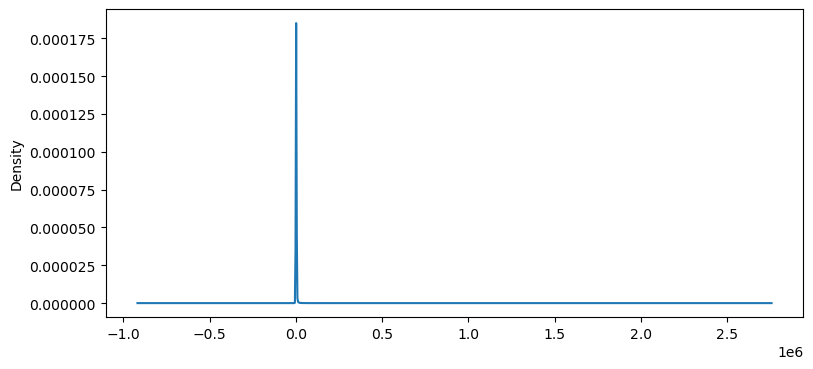

In [28]:
plt.figure(figsize=(9,4))
listings.price.plot.kde();

Check maximums

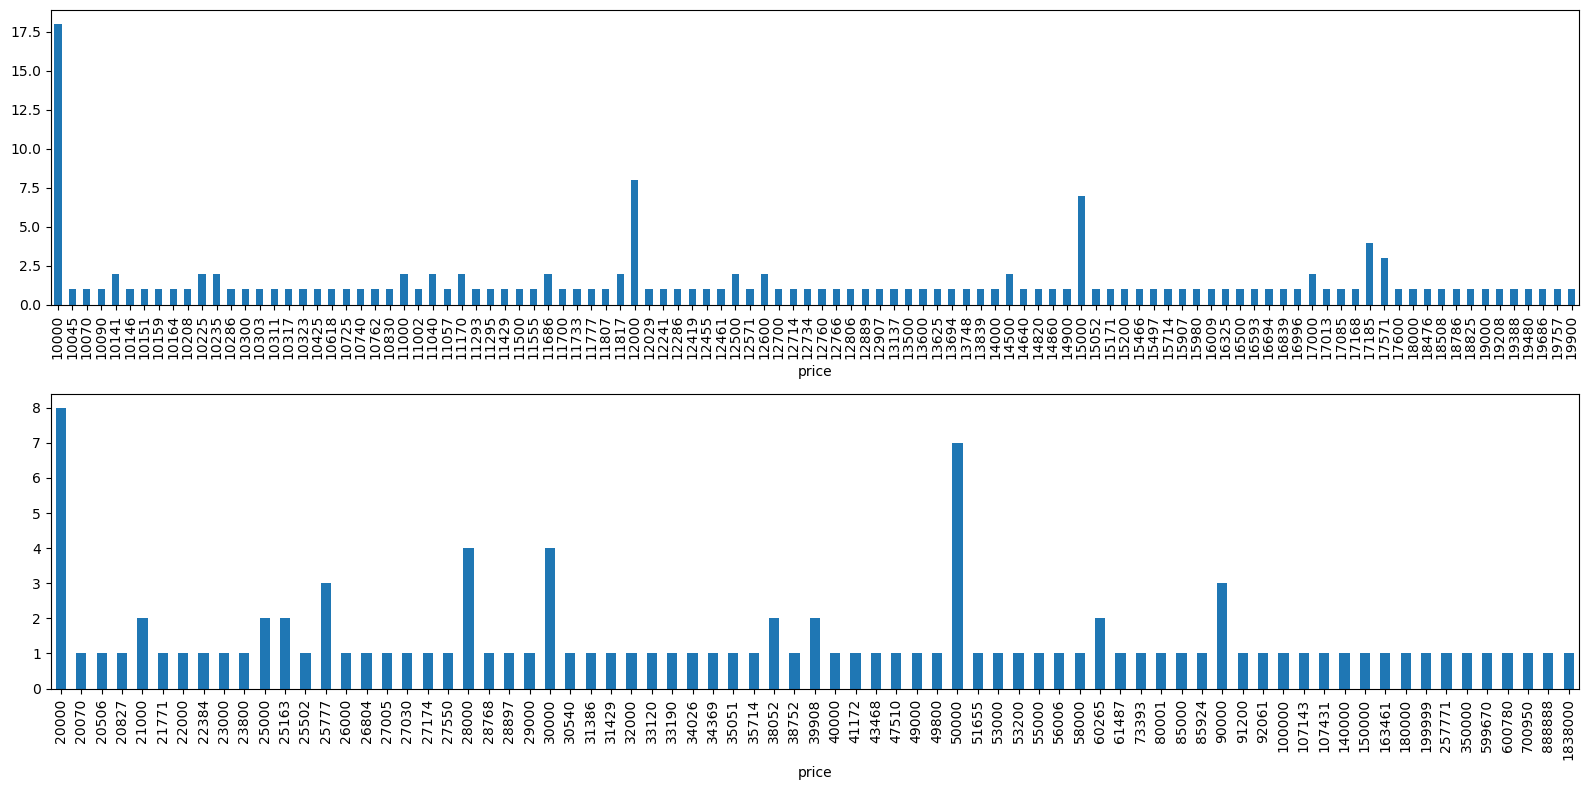

In [29]:
fig, ax = plt.subplots(2,1,figsize=(16,8))
listings.price.loc[(listings.price >= 10_000)&(listings.price < 20_000)]\
    .value_counts().sort_index().plot.bar(ax=ax[0])
listings.price.loc[(listings.price >= 20_000)]\
    .value_counts().sort_index().plot.bar(ax=ax[1])
plt.xticks(size = 10)
plt.tight_layout()

Conclusion:

* The value 1,838,000.0 has a low frequency and is very far from values that could be valid, such as 10,000, so let's narrow down the records.

In [30]:
listings = listings[listings.price <= 10_000]
listings

,id,name,host_id,neighbourhood,neighbourhood_group,latitude,longitude,room_type,price,minimum_nights,calculated_host_listings_count,availability_365,geopoint
0,35797,Villa in Mexico City · 1 bedroom · 1 bed · 1 bath,153786,Lomas De Vista Hermosa,Cuajimalpa de Morelos,19.382830,-99.271780,Entire home/apt,3437,1,1,363,POINT (-99.27178000000001 19.38283)
2,61792,Home in Mexico City · ★4.92 · 1 bedroom · 1 be...,299558,Hipodromo Condesa,Cuauhtémoc,19.410830,-99.180570,Private room,1031,2,2,180,POINT (-99.18057 19.41083)
3,67703,Rental unit in Mexico City · ★4.89 · 2 bedroom...,334451,Hipodromo I,Cuauhtémoc,19.411520,-99.168570,Entire home/apt,1890,4,2,307,POINT (-99.16857 19.41152)
4,70644,Rental unit in Mexico City · ★4.91 · 1 bedroom...,212109,Del Carmen,Coyoacán,19.354480,-99.162170,Entire home/apt,737,5,3,158,POINT (-99.16217 19.35448)
5,84500,Home in Mexico City · 3 bedrooms · 3 beds · 3....,457875,Villa Coyoacan,Coyoacán,19.347240,-99.165510,Entire home/apt,3179,10,1,71,POINT (-99.16551 19.34724)
...,...,...,...,...,...,...,...,...,...,...,...,...,...
26313,985673895001471605,Rental unit in Mexico City · ★New · 2 bedrooms...,200235979,Roma Sur I,Cuauhtémoc,19.409586,-99.166383,Entire home/apt,1525,1,5,269,POINT (-99.16638342566732 19.40958574478913)
26314,985676768542852342,Hotel in Mexico City · ★New · 1 bedroom · 1 be...,538290721,Hipodromo I,Cuauhtémoc,19.409086,-99.170103,Private room,1360,1,1,356,POINT (-99.17010336758148 19.40908577520423)
26315,985758830966947800,Rental unit in Mexico City · ★New · 3 bedrooms...,498096522,Juarez,Cuauhtémoc,19.424403,-99.162281,Entire home/apt,2400,1,62,352,POINT (-99.16228113130036 19.42440295842983)
26316,985775761856052521,Rental unit in Mexico City · ★New · 4 bedrooms...,498096522,Granada,Miguel Hidalgo,19.439136,-99.201918,Entire home/apt,3401,1,62,355,POINT (-99.201917560672 19.43913601375317)


In [31]:
listings.shape

(25970, 13)

Check values close to zero

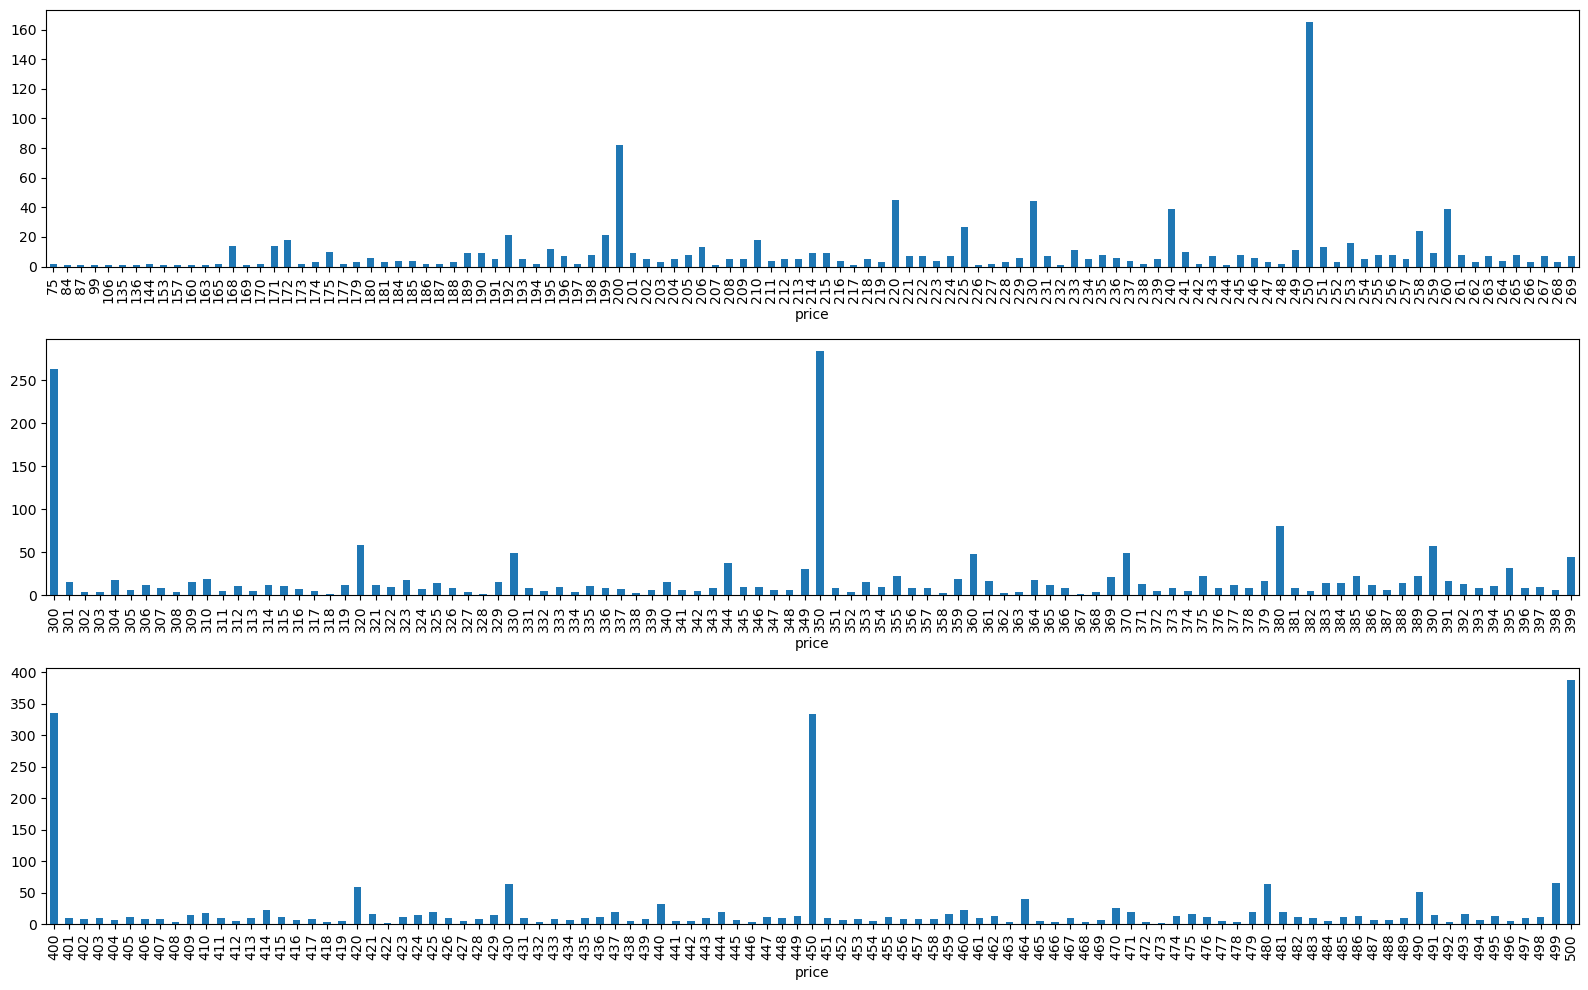

In [32]:
fig, ax = plt.subplots(3,1, figsize=(16,10))
listings.price.loc[(listings.price < 270)].value_counts().sort_index().plot.bar(ax=ax[0])
listings.price.loc[(listings.price >= 300)&(listings.price < 400)]\
    .value_counts().sort_index().plot.bar(ax=ax[1])
listings.price.loc[(listings.price >= 400) & (listings.price <= 500)]\
    .value_counts().sort_index().plot.bar(ax[2])
plt.xticks(size = 10)
plt.tight_layout()

Conclusion:

* There is a peak at 400 pesos and it seems that below that amount it would be difficult to obtain profitability, so we are going to discard the properties that are rented below  400 pesos.

In [33]:
listings = listings[listings.price > 399]
listings

,id,name,host_id,neighbourhood,neighbourhood_group,latitude,longitude,room_type,price,minimum_nights,calculated_host_listings_count,availability_365,geopoint
0,35797,Villa in Mexico City · 1 bedroom · 1 bed · 1 bath,153786,Lomas De Vista Hermosa,Cuajimalpa de Morelos,19.382830,-99.271780,Entire home/apt,3437,1,1,363,POINT (-99.27178000000001 19.38283)
2,61792,Home in Mexico City · ★4.92 · 1 bedroom · 1 be...,299558,Hipodromo Condesa,Cuauhtémoc,19.410830,-99.180570,Private room,1031,2,2,180,POINT (-99.18057 19.41083)
3,67703,Rental unit in Mexico City · ★4.89 · 2 bedroom...,334451,Hipodromo I,Cuauhtémoc,19.411520,-99.168570,Entire home/apt,1890,4,2,307,POINT (-99.16857 19.41152)
4,70644,Rental unit in Mexico City · ★4.91 · 1 bedroom...,212109,Del Carmen,Coyoacán,19.354480,-99.162170,Entire home/apt,737,5,3,158,POINT (-99.16217 19.35448)
5,84500,Home in Mexico City · 3 bedrooms · 3 beds · 3....,457875,Villa Coyoacan,Coyoacán,19.347240,-99.165510,Entire home/apt,3179,10,1,71,POINT (-99.16551 19.34724)
...,...,...,...,...,...,...,...,...,...,...,...,...,...
26313,985673895001471605,Rental unit in Mexico City · ★New · 2 bedrooms...,200235979,Roma Sur I,Cuauhtémoc,19.409586,-99.166383,Entire home/apt,1525,1,5,269,POINT (-99.16638342566732 19.40958574478913)
26314,985676768542852342,Hotel in Mexico City · ★New · 1 bedroom · 1 be...,538290721,Hipodromo I,Cuauhtémoc,19.409086,-99.170103,Private room,1360,1,1,356,POINT (-99.17010336758148 19.40908577520423)
26315,985758830966947800,Rental unit in Mexico City · ★New · 3 bedrooms...,498096522,Juarez,Cuauhtémoc,19.424403,-99.162281,Entire home/apt,2400,1,62,352,POINT (-99.16228113130036 19.42440295842983)
26316,985775761856052521,Rental unit in Mexico City · ★New · 4 bedrooms...,498096522,Granada,Miguel Hidalgo,19.439136,-99.201918,Entire home/apt,3401,1,62,355,POINT (-99.201917560672 19.43913601375317)


In [34]:
listings.shape

(22656, 13)

Check minimum_nights maximums

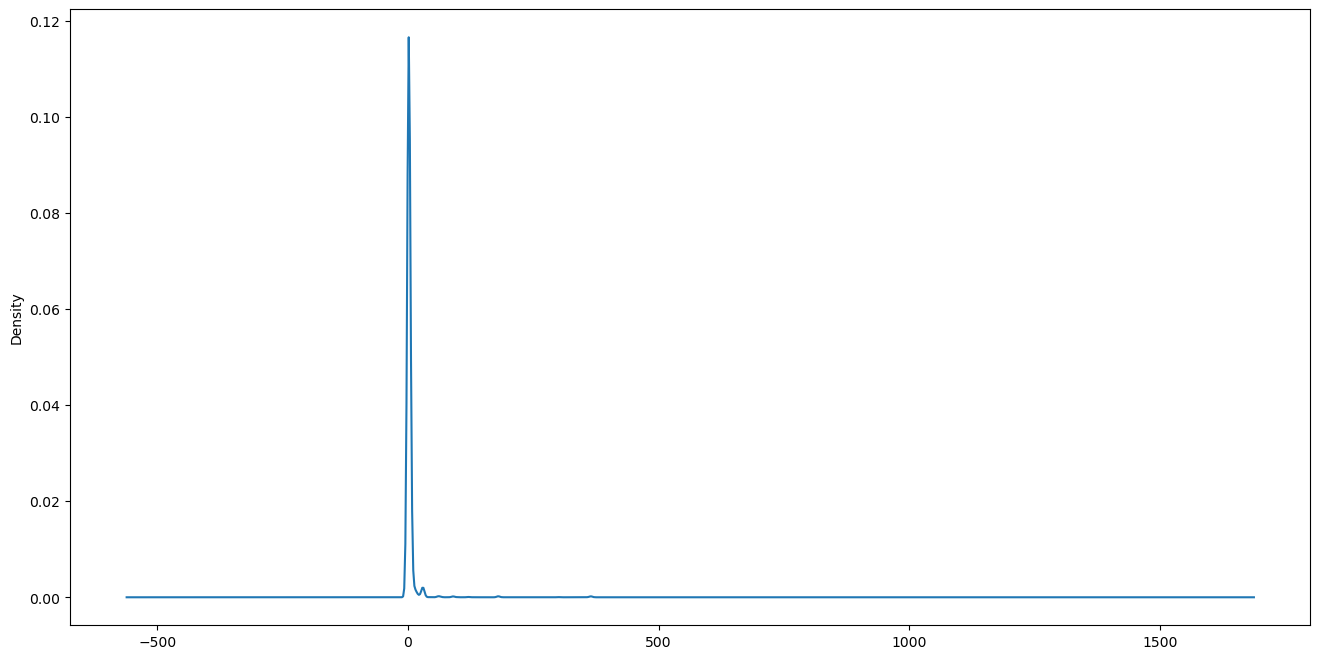

In [35]:
plt.figure(figsize=(16,8))
listings.minimum_nights.plot.kde();

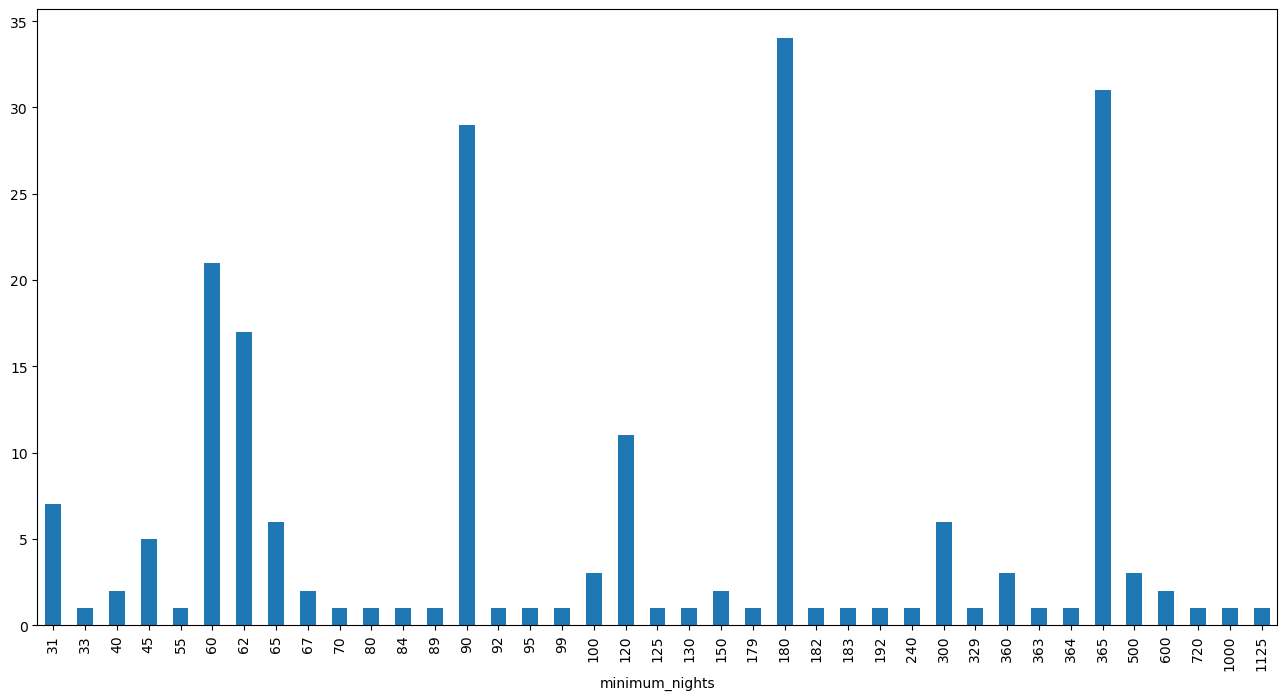

In [36]:
plt.figure(figsize=(16,8))
listings.minimum_nights.loc[listings.minimum_nights > 30]\
    .value_counts().sort_index().plot.bar()
plt.show()

Check calculated_host_listings_count maximums

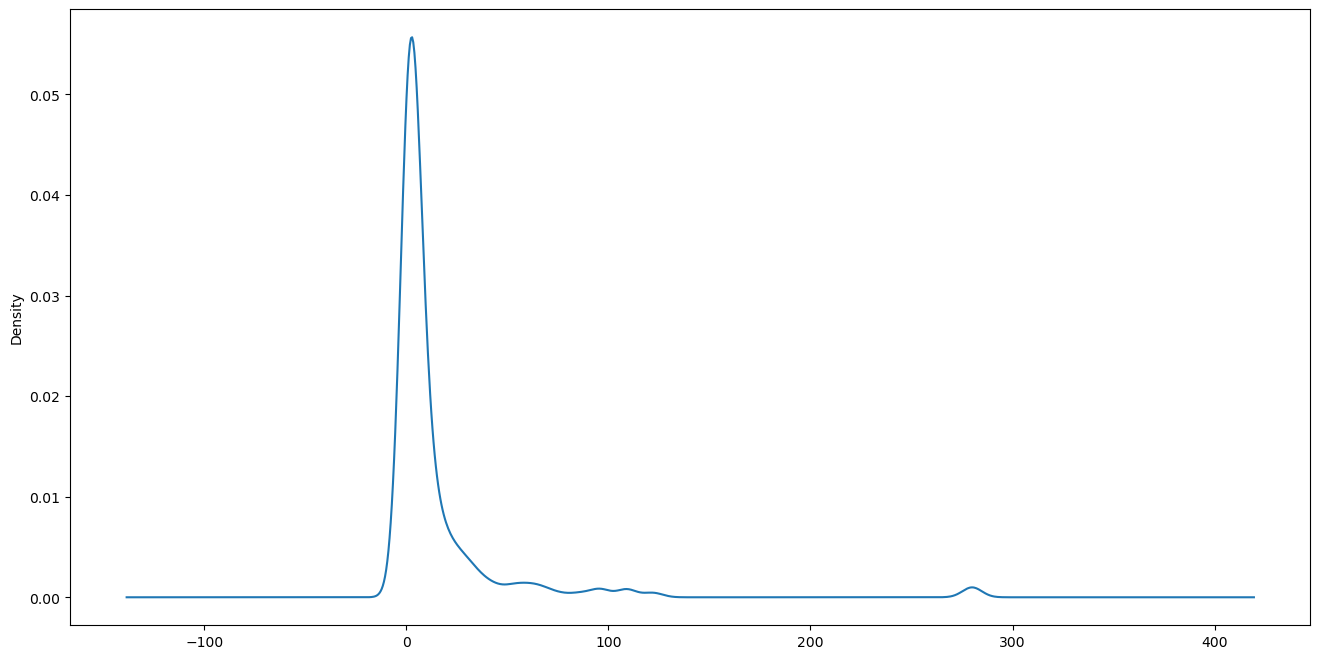

In [37]:
plt.figure(figsize=(16,8))
listings.calculated_host_listings_count.plot.kde()
plt.show()

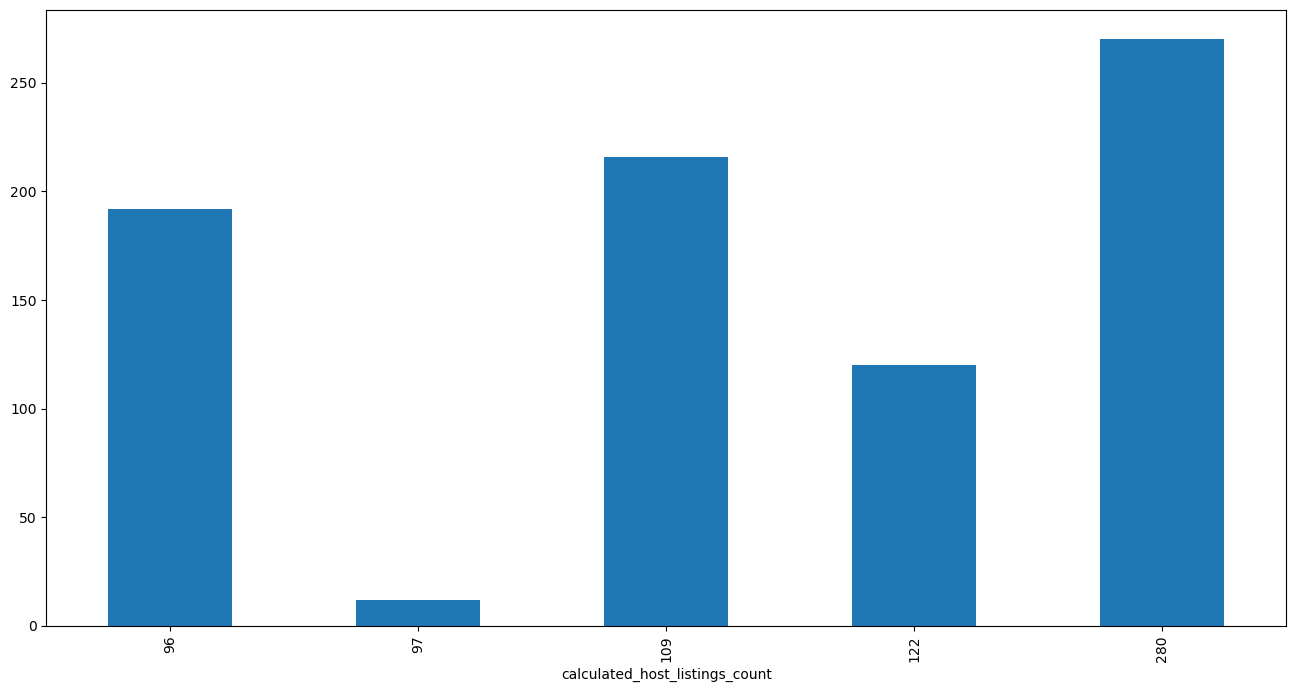

In [38]:
plt.figure(figsize=(16,8))
listings[listings.calculated_host_listings_count > 90]\
    .calculated_host_listings_count.value_counts().sort_index().plot.bar();

The minimum_nights and calculated_host_listings_count are not essential for our analysis, but it would be worth consulting it with the valuation team.

### listings_detail table

#### General view

In [39]:
listings_detail.head()

,index,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,0,35797,https://www.airbnb.com/rooms/35797,20230922223244,2023-09-23,city scrape,Villa in Mexico City · 1 bedroom · 1 bed · 1 bath,"Dentro de Villa un estudio de arte con futon, ...","Centro comercial Santa Fe, parque interlomas y...",https://a0.muscache.com/pictures/f395ab78-1185...,...,NaN,NaN,NaN,NaN,f,1,1,0,0,NaN
1,1,611179,https://www.airbnb.com/rooms/611179,20230922223244,2023-09-23,city scrape,Condo in Mexico City · 1 bedroom · 2 beds · 1....,LOTS OF SPACE AND STYLE. ROMANTIC. <br />AMAZI...,"Mexico City's historic center, declared a Worl...",https://a0.muscache.com/pictures/7734976/9633d...,...,4.00,3.00,4.00,NaN,f,6,6,0,0,0.01
2,2,611337,https://www.airbnb.com/rooms/611337,20230922223244,2023-09-23,city scrape,Condo in Mexico City · ★5.0 · 2 bedrooms · 4 b...,IDEAL FOR 2 COUPLES OR 4 FRIENDS <br />LOTS O...,"Mexico City's historic center, declared a Worl...",https://a0.muscache.com/pictures/51547139/b996...,...,5.00,5.00,5.00,NaN,f,6,6,0,0,0.04
3,3,613181,https://www.airbnb.com/rooms/613181,20230922223244,2023-09-23,city scrape,Rental unit in Mexico City · ★4.76 · 2 bedroom...,"Couples history with comfort, playful elegance...",Casa Tezontle is in Mexico’s City Historic Dow...,https://a0.muscache.com/pictures/9084124/44864...,...,4.95,4.73,4.72,NaN,t,1,1,0,0,1.47
4,4,617137,https://www.airbnb.com/rooms/617137,20230922223244,2023-09-23,previous scrape,Rental unit in Mexico City · 1 bedroom · 1 bed...,<b>The space</b><br />All services. 2 rooms. 1...,None,https://a0.muscache.com/pictures/9187120/91a96...,...,NaN,NaN,NaN,NaN,f,1,0,0,1,NaN


In [40]:
listings_detail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26318 entries, 0 to 26317
Data columns (total 76 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   index                                         26318 non-null  int64  
 1   id                                            26318 non-null  int64  
 2   listing_url                                   26318 non-null  object 
 3   scrape_id                                     26318 non-null  int64  
 4   last_scraped                                  26318 non-null  object 
 5   source                                        26318 non-null  object 
 6   name                                          26318 non-null  object 
 7   description                                   25389 non-null  object 
 8   neighborhood_overview                         16374 non-null  object 
 9   picture_url                                   26318 non-null 

#### Variables and types

We are going to include those variables that we will need for our objective.

In [41]:
to_include = ['id',
              'description',
              'host_is_superhost',
              'accommodates',
              'bathrooms',
              'bedrooms',
              'beds',
              'number_of_reviews',
              'review_scores_rating',
              'review_scores_communication',
              'review_scores_location',
             ]
listings_detail = listings_detail.loc[:,to_include]
listings_detail


,id,description,host_is_superhost,accommodates,bathrooms,bedrooms,beds,number_of_reviews,review_scores_rating,review_scores_communication,review_scores_location
0,35797,"Dentro de Villa un estudio de arte con futon, ...",f,2,NaN,1.0,1.0,0,NaN,NaN,NaN
1,611179,LOTS OF SPACE AND STYLE. ROMANTIC. <br />AMAZI...,t,2,NaN,1.0,2.0,1,5.00,4.00,3.00
2,611337,IDEAL FOR 2 COUPLES OR 4 FRIENDS <br />LOTS O...,t,4,NaN,2.0,4.0,4,5.00,5.00,5.00
3,613181,"Couples history with comfort, playful elegance...",t,4,NaN,2.0,2.0,199,4.76,4.95,4.73
4,617137,<b>The space</b><br />All services. 2 rooms. 1...,f,2,NaN,NaN,1.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
26313,985546837773775065,We love hosting guests from all over the world...,t,4,NaN,2.0,2.0,0,NaN,NaN,NaN
26314,985586093839692218,At Virtual Homes we focus on guest satisfactio...,f,4,NaN,2.0,2.0,0,NaN,NaN,NaN
26315,985625494921549399,Un loft privado muy tranquilo para 2 personas ...,f,2,NaN,1.0,1.0,0,NaN,NaN,NaN
26316,985638913345980844,"Casa muy céntrica, a 5 minutos de san ángel, a...",f,5,NaN,3.0,3.0,0,NaN,NaN,NaN


Analyze data types

In [42]:
listings_detail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26318 entries, 0 to 26317
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           26318 non-null  int64  
 1   description                  25389 non-null  object 
 2   host_is_superhost            25303 non-null  object 
 3   accommodates                 26318 non-null  int64  
 4   bathrooms                    0 non-null      float64
 5   bedrooms                     18750 non-null  float64
 6   beds                         26092 non-null  float64
 7   number_of_reviews            26318 non-null  int64  
 8   review_scores_rating         22233 non-null  float64
 9   review_scores_communication  22182 non-null  float64
 10  review_scores_location       22181 non-null  float64
dtypes: float64(6), int64(3), object(2)
memory usage: 2.2+ MB


Convert host_is_superhost to categorical type

In [43]:
listings_detail['host_is_superhost'] = listings_detail['host_is_superhost']\
    .astype('category')
listings_detail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26318 entries, 0 to 26317
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   id                           26318 non-null  int64   
 1   description                  25389 non-null  object  
 2   host_is_superhost            25303 non-null  category
 3   accommodates                 26318 non-null  int64   
 4   bathrooms                    0 non-null      float64 
 5   bedrooms                     18750 non-null  float64 
 6   beds                         26092 non-null  float64 
 7   number_of_reviews            26318 non-null  int64   
 8   review_scores_rating         22233 non-null  float64 
 9   review_scores_communication  22182 non-null  float64 
 10  review_scores_location       22181 non-null  float64 
dtypes: category(1), float64(6), int64(3), object(1)
memory usage: 2.0+ MB


#### Check for null values

In [44]:
listings_detail.isnull().sum()

id                                 0
description                      929
host_is_superhost               1015
accommodates                       0
bathrooms                      26318
bedrooms                        7568
beds                             226
number_of_reviews                  0
review_scores_rating            4085
review_scores_communication     4136
review_scores_location          4137
dtype: int64

Conclusions:

* description: null values do not affect the type of analysis, so we leave the column.
* host_is_superhost: has few null values and is not a relevant variable, so we leave the column.
* bathrooms: is completly null, so we eliminate it.
* bedrooms: is an important variable for us, we can try to impute the null values through proxies such as accomodates or beds columns.
* beds: we can try to impute it with the column accommodates.


Check if the beds column can be imputed from the accomodates(people than can stay).

In [45]:
pd.crosstab(listings_detail.beds, listings_detail.accommodates)

accommodates,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
beds,,,,,,,,,,,,,,,,
1.0,2757,9131,684,364,21,17,0,6,0,3,0,1,0,1,2,16
2.0,102,1039,1446,4125,335,180,14,11,1,2,0,0,0,0,0,2
3.0,19,52,145,1175,689,1021,49,55,2,2,0,1,2,0,1,0
4.0,12,20,14,188,241,476,139,243,11,14,2,3,1,1,0,1
5.0,4,8,4,15,53,117,60,126,46,104,5,10,1,1,1,3
6.0,4,0,1,7,7,21,17,55,17,35,13,42,5,2,2,4
7.0,4,3,0,3,1,4,3,15,2,26,6,15,9,24,1,12
8.0,1,1,0,1,3,3,0,8,2,8,4,8,1,5,5,27
9.0,2,1,0,0,0,2,2,0,11,7,1,8,2,5,9,26


By reading the matrix we can see that:

* one or two people are usually accommodated with *a bed*.
* three or four people are usually accommodated with *two beds*.
* five or six people are usually accommodated with *three beds*.
* seven or more people we will assign *four beds*.


Check the number of nulls and the frequency of each value.

In [46]:
listings_detail.beds.value_counts(dropna=False)

beds
1.0     13003
2.0      7257
3.0      3213
4.0      1366
5.0       558
6.0       232
NaN       226
7.0       128
8.0        77
9.0        76
10.0       39
12.0       34
16.0       23
11.0       17
13.0       14
14.0        9
18.0        8
15.0        6
17.0        5
19.0        4
21.0        4
22.0        3
20.0        3
50.0        3
32.0        2
25.0        2
35.0        1
40.0        1
36.0        1
28.0        1
45.0        1
61.0        1
Name: count, dtype: int64

Write a function to impute null values from accommodates

In [47]:
def impute_null(row):
    # List of conditions
    conditions = [(row.accommodates <= 2),
                  (row.accommodates > 2) & (row.accommodates <= 4),
                  (row.accommodates > 4) & (row.accommodates <= 6),
                  (row.accommodates > 6)
                 ]
    # Results list
    results = [1, 2, 3, 4]
    return(np.select(conditions, results, default=-999))

In [48]:
listings_detail.loc[listings_detail.beds.isnull(), 'beds'] = listings_detail.loc[
    listings_detail.beds.isnull(), ['accommodates']]\
    .apply(impute_null, axis=1).astype('float64')

In [49]:
listings_detail.beds.value_counts(dropna=False)

beds
1.0     13197
2.0      7276
3.0      3220
4.0      1372
5.0       558
6.0       232
7.0       128
8.0        77
9.0        76
10.0       39
12.0       34
16.0       23
11.0       17
13.0       14
14.0        9
18.0        8
15.0        6
17.0        5
19.0        4
21.0        4
22.0        3
20.0        3
50.0        3
32.0        2
25.0        2
35.0        1
40.0        1
36.0        1
28.0        1
45.0        1
61.0        1
Name: count, dtype: int64

Check if the null values of the bedrooms can be imputed through proxies such as accomodates or beds columns.

In [50]:
pd.crosstab(listings_detail.bedrooms, listings_detail.accommodates)

accommodates,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
bedrooms,,,,,,,,,,,,,,,,
1.0,487,5883,1372,1330,86,56,3,8,1,2,0,1,0,0,1,7
2.0,11,274,549,4032,1014,799,90,109,16,12,2,1,0,2,2,8
3.0,9,9,31,126,189,904,144,254,39,77,11,21,4,4,0,8
4.0,4,34,2,18,8,23,34,125,13,54,13,22,3,8,6,20
5.0,1,6,1,2,3,3,3,7,6,43,2,23,7,13,6,16
6.0,1,7,0,13,1,2,4,2,0,3,1,19,3,6,9,18
7.0,0,6,0,0,1,3,1,0,0,1,0,3,5,11,2,15
8.0,0,3,0,0,0,0,1,1,0,0,0,0,1,0,0,22
9.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,11


It's not very clear.

Check with the number of beds.

In [51]:
pd.crosstab(listings_detail.bedrooms, listings_detail.beds)

beds,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,...,20.0,21.0,22.0,25.0,28.0,32.0,36.0,45.0,50.0,61.0
bedrooms,,,,,,,,,,,,,,,,,,,,,
1.0,6697,2263,206,56,7,5,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
2.0,219,3961,2015,575,102,30,4,9,1,1,...,0,0,0,0,0,0,0,1,0,0
3.0,13,71,805,520,273,83,35,9,10,4,...,0,0,0,0,0,0,0,0,0,1
4.0,37,9,14,126,84,48,27,18,9,8,...,0,0,0,0,0,0,0,0,0,0
5.0,5,4,3,2,45,31,14,10,14,6,...,0,0,0,0,0,0,0,0,0,0
6.0,9,12,4,3,0,17,12,2,7,10,...,0,0,0,0,0,0,0,0,0,0
7.0,6,0,2,3,0,0,16,8,6,1,...,0,0,0,0,0,0,0,0,0,0
8.0,3,0,0,1,0,0,1,9,5,2,...,0,0,0,0,0,0,0,0,0,0
9.0,0,0,0,0,0,0,0,0,2,0,...,0,1,0,0,0,0,0,0,0,0


By reading the matrix we can see that:

* one bed are usually corresponds to one bedroom.
* two, three or four beds are usually corresponds to two bedrooms.
* five or six beds are usually corresponds with three bedrooms.
* more than 6 beds we will assign four bedrooms.

Check the number of nulls and the frequency of each value.

In [56]:
listings_detail.bedrooms.value_counts(dropna=False)

bedrooms
1.0     9237
NaN     7568
2.0     6921
3.0     1830
4.0      387
5.0      142
6.0       89
7.0       48
8.0       28
10.0      18
9.0       11
12.0       8
11.0       7
16.0       5
15.0       4
18.0       3
50.0       3
13.0       3
14.0       2
25.0       1
20.0       1
23.0       1
22.0       1
Name: count, dtype: int64

Update the impute_null function

In [60]:
def impute_null(row):
    # List of conditions
    conditions = [(row.beds <= 1),
                  (row.beds > 1) & (row.beds <= 4),
                  (row.beds > 4) & (row.beds <= 6),
                  (row.beds > 6)
                 ]
    # Results list
    results = [1, 2, 3, 4]
    return(np.select(conditions, results, default=-999))

In [63]:
#Imputation
listings_detail.loc[listings_detail.bedrooms.isnull(), 'bedrooms'] = listings_detail\
    .loc[listings_detail.bedrooms.isnull()].apply(impute_null, axis = 1).astype('float64')

In [64]:
listings_detail.bedrooms.value_counts(dropna=False)

bedrooms
1.0     15442
2.0      8131
3.0      1891
4.0       479
5.0       142
6.0        89
7.0        48
8.0        28
10.0       18
9.0        11
12.0        8
11.0        7
16.0        5
15.0        4
50.0        3
13.0        3
18.0        3
14.0        2
20.0        1
23.0        1
25.0        1
22.0        1
Name: count, dtype: int64

Delete bathrooms

In [68]:
listings_detail.drop(columns='bathrooms', inplace=True)
listings_detail

,id,description,host_is_superhost,accommodates,bedrooms,beds,number_of_reviews,review_scores_rating,review_scores_communication,review_scores_location
0,35797,"Dentro de Villa un estudio de arte con futon, ...",f,2,1.0,1.0,0,NaN,NaN,NaN
1,611179,LOTS OF SPACE AND STYLE. ROMANTIC. <br />AMAZI...,t,2,1.0,2.0,1,5.00,4.00,3.00
2,611337,IDEAL FOR 2 COUPLES OR 4 FRIENDS <br />LOTS O...,t,4,2.0,4.0,4,5.00,5.00,5.00
3,613181,"Couples history with comfort, playful elegance...",t,4,2.0,2.0,199,4.76,4.95,4.73
4,617137,<b>The space</b><br />All services. 2 rooms. 1...,f,2,1.0,1.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
26313,985546837773775065,We love hosting guests from all over the world...,t,4,2.0,2.0,0,NaN,NaN,NaN
26314,985586093839692218,At Virtual Homes we focus on guest satisfactio...,f,4,2.0,2.0,0,NaN,NaN,NaN
26315,985625494921549399,Un loft privado muy tranquilo para 2 personas ...,f,2,1.0,1.0,0,NaN,NaN,NaN
26316,985638913345980844,"Casa muy céntrica, a 5 minutos de san ángel, a...",f,5,3.0,3.0,0,NaN,NaN,NaN


#### Check for duplicate values

In [70]:
listings_detail.duplicated().sum()

0

In [71]:
listings_detail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26318 entries, 0 to 26317
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   id                           26318 non-null  int64   
 1   description                  25389 non-null  object  
 2   host_is_superhost            25303 non-null  category
 3   accommodates                 26318 non-null  int64   
 4   bedrooms                     26318 non-null  float64 
 5   beds                         26318 non-null  float64 
 6   number_of_reviews            26318 non-null  int64   
 7   review_scores_rating         22233 non-null  float64 
 8   review_scores_communication  22182 non-null  float64 
 9   review_scores_location       22181 non-null  float64 
dtypes: category(1), float64(5), int64(3), object(1)
memory usage: 1.8+ MB


#### Analysis of categorical variables

Let's analyze the values and frequencies of the categorical variables.

In [72]:
listings_detail.host_is_superhost.value_counts()

host_is_superhost
f    15979
t     9324
Name: count, dtype: int64

#### Analysis of numerical variables

In [75]:
listings_detail.describe(include='number').T

,count,mean,std,min,25%,50%,75%,max
id,26318.0,3.753743e+17,4.089193e+17,35797.0,35865142.25,53169206.50,8.065491e+17,9.857807e+17
accommodates,26318.0,3.323581e+00,2.276381e+00,1.0,2.00,2.00,4.000000e+00,1.600000e+01
bedrooms,26318.0,1.597766e+00,1.147283e+00,1.0,1.00,1.00,2.000000e+00,5.000000e+01
beds,26318.0,1.977734e+00,1.781432e+00,1.0,1.00,1.00,2.000000e+00,6.100000e+01
number_of_reviews,26318.0,3.727141e+01,6.538901e+01,0.0,2.00,12.00,4.400000e+01,1.222000e+03
review_scores_rating,22233.0,4.730111e+00,4.936650e-01,0.0,4.69,4.85,4.980000e+00,5.000000e+00
review_scores_communication,22182.0,4.822929e+00,4.062768e-01,1.0,4.81,4.94,5.000000e+00,5.000000e+00
review_scores_location,22181.0,4.834958e+00,3.655191e-01,1.0,4.81,4.94,5.000000e+00,5.000000e+00


Nothing that catches our attention.

## Generate analytical data mart

We have two main tables:

* listings: contain main data
* listings_detail: contain additional data

Both tables share the id column, therefore cross by it, the listings table will control the integration.

* price: contains real estate prices per square meter, conceptually crosses listings table throughout the municipality(neighbourhood_group column).


Cross listings with listings_detail

In [88]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22656 entries, 0 to 26317
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   id                              22656 non-null  int64   
 1   name                            22656 non-null  object  
 2   host_id                         22656 non-null  int64   
 3   neighbourhood                   22656 non-null  object  
 4   neighbourhood_group             22656 non-null  category
 5   latitude                        22656 non-null  float64 
 6   longitude                       22656 non-null  float64 
 7   room_type                       22656 non-null  category
 8   price                           22656 non-null  int64   
 9   minimum_nights                  22656 non-null  int64   
 10  calculated_host_listings_count  22656 non-null  int64   
 11  availability_365                22656 non-null  int64   
dtypes: category(2), float64

In [89]:
listings.shape

(22656, 12)

In [80]:
listings_detail.shape

(26318, 10)

In [91]:
df = pd.merge(left=listings, right=listings_detail, how='left', on='id')
df

,id,name,host_id,neighbourhood,neighbourhood_group,latitude,longitude,room_type,price,minimum_nights,...,availability_365,description,host_is_superhost,accommodates,bedrooms,beds,number_of_reviews,review_scores_rating,review_scores_communication,review_scores_location
0,35797,Villa in Mexico City · 1 bedroom · 1 bed · 1 bath,153786,Lomas De Vista Hermosa,Cuajimalpa de Morelos,19.382830,-99.271780,Entire home/apt,3437,1,...,363,"Dentro de Villa un estudio de arte con futon, ...",f,2,1.0,1.0,0,NaN,NaN,NaN
1,61792,Home in Mexico City · ★4.92 · 1 bedroom · 1 be...,299558,Hipodromo Condesa,Cuauhtémoc,19.410830,-99.180570,Private room,1031,2,...,180,"Located in La Condesa, one of the best neighbo...",f,2,1.0,1.0,63,4.92,4.95,4.94
2,67703,Rental unit in Mexico City · ★4.89 · 2 bedroom...,334451,Hipodromo I,Cuauhtémoc,19.411520,-99.168570,Entire home/apt,1890,4,...,307,"Comfortably furnished, sunny, 2 bedroom apt., ...",f,4,2.0,2.0,47,4.89,4.91,4.98
3,70644,Rental unit in Mexico City · ★4.91 · 1 bedroom...,212109,Del Carmen,Coyoacán,19.354480,-99.162170,Entire home/apt,737,5,...,158,COYOACAN designer studio quiet & safe! well eq...,f,2,1.0,1.0,120,4.91,4.98,4.97
4,84500,Home in Mexico City · 3 bedrooms · 3 beds · 3....,457875,Villa Coyoacan,Coyoacán,19.347240,-99.165510,Entire home/apt,3179,10,...,71,https://www.nytimes.com/2018/04/20/travel/mexi...,f,8,3.0,3.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22651,985673895001471605,Rental unit in Mexico City · ★New · 2 bedrooms...,200235979,Roma Sur I,Cuauhtémoc,19.409586,-99.166383,Entire home/apt,1525,1,...,269,Descubre una experiencia única en la Colonia C...,f,4,2.0,2.0,0,NaN,NaN,NaN
22652,985676768542852342,Hotel in Mexico City · ★New · 1 bedroom · 1 be...,538290721,Hipodromo I,Cuauhtémoc,19.409086,-99.170103,Private room,1360,1,...,356,Este lugar lleno de estilo está cerca de todo ...,f,2,1.0,1.0,0,NaN,NaN,NaN
22653,985758830966947800,Rental unit in Mexico City · ★New · 3 bedrooms...,498096522,Juarez,Cuauhtémoc,19.424403,-99.162281,Entire home/apt,2400,1,...,352,At Virtual Homes we focus on guest satisfactio...,f,6,3.0,3.0,0,NaN,NaN,NaN
22654,985775761856052521,Rental unit in Mexico City · ★New · 4 bedrooms...,498096522,Granada,Miguel Hidalgo,19.439136,-99.201918,Entire home/apt,3401,1,...,355,Enjoy an unparalleled experience of comfort an...,f,7,4.0,4.0,0,NaN,NaN,NaN


Incorporate price information per square meter

In [92]:
price_m2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   neighbourhood  16 non-null     object
 1   price_m2       16 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 384.0+ bytes


Compare the neighbourhood names of the two list and find differences.

In [130]:
neigbourhood = listings.neighbourhood_group.sort_values().unique().tolist()
neigbourhood_price = price_m2.neighbourhood.sort_values().tolist()
notfound1 = list(filter(lambda x: x not in neigbourhood, neigbourhood_price))
notfound2 = list(filter(lambda x: x not in neigbourhood_price, neigbourhood))
print(f'price_m2 items not found in listings:\n{notfound1}')
print(f'listings items not found in price_m2:\n{notfound2}')

price_m2 items not found in listings:
[]
listings items not found in price_m2:
[]


Cross df with price_m2, df controls

In [132]:
df.shape

(22656, 21)

In [133]:
price_m2.shape

(16, 2)

In [135]:
price_m2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   neighbourhood  16 non-null     object
 1   price_m2       16 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 384.0+ bytes


In [139]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22656 entries, 0 to 22655
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   id                              22656 non-null  int64   
 1   name                            22656 non-null  object  
 2   host_id                         22656 non-null  int64   
 3   neighbourhood                   22656 non-null  object  
 4   neighbourhood_group             22656 non-null  category
 5   latitude                        22656 non-null  float64 
 6   longitude                       22656 non-null  float64 
 7   room_type                       22656 non-null  category
 8   price                           22656 non-null  int64   
 9   minimum_nights                  22656 non-null  int64   
 10  calculated_host_listings_count  22656 non-null  int64   
 11  availability_365                22656 non-null  int64   
 12  description       

In [140]:
df = pd.merge(left=df, right=price_m2,
         how='left', left_on='neighbourhood_group', right_on='neighbourhood')
df

,id,name,host_id,neighbourhood_x,neighbourhood_group,latitude,longitude,room_type,price,minimum_nights,...,host_is_superhost,accommodates,bedrooms,beds,number_of_reviews,review_scores_rating,review_scores_communication,review_scores_location,neighbourhood_y,price_m2
0,35797,Villa in Mexico City · 1 bedroom · 1 bed · 1 bath,153786,Lomas De Vista Hermosa,Cuajimalpa de Morelos,19.382830,-99.271780,Entire home/apt,3437,1,...,f,2,1.0,1.0,0,NaN,NaN,NaN,Cuajimalpa de Morelos,36352
1,61792,Home in Mexico City · ★4.92 · 1 bedroom · 1 be...,299558,Hipodromo Condesa,Cuauhtémoc,19.410830,-99.180570,Private room,1031,2,...,f,2,1.0,1.0,63,4.92,4.95,4.94,Cuauhtémoc,34599
2,67703,Rental unit in Mexico City · ★4.89 · 2 bedroom...,334451,Hipodromo I,Cuauhtémoc,19.411520,-99.168570,Entire home/apt,1890,4,...,f,4,2.0,2.0,47,4.89,4.91,4.98,Cuauhtémoc,34599
3,70644,Rental unit in Mexico City · ★4.91 · 1 bedroom...,212109,Del Carmen,Coyoacán,19.354480,-99.162170,Entire home/apt,737,5,...,f,2,1.0,1.0,120,4.91,4.98,4.97,Coyoacán,33101
4,84500,Home in Mexico City · 3 bedrooms · 3 beds · 3....,457875,Villa Coyoacan,Coyoacán,19.347240,-99.165510,Entire home/apt,3179,10,...,f,8,3.0,3.0,0,NaN,NaN,NaN,Coyoacán,33101
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22651,985673895001471605,Rental unit in Mexico City · ★New · 2 bedrooms...,200235979,Roma Sur I,Cuauhtémoc,19.409586,-99.166383,Entire home/apt,1525,1,...,f,4,2.0,2.0,0,NaN,NaN,NaN,Cuauhtémoc,34599
22652,985676768542852342,Hotel in Mexico City · ★New · 1 bedroom · 1 be...,538290721,Hipodromo I,Cuauhtémoc,19.409086,-99.170103,Private room,1360,1,...,f,2,1.0,1.0,0,NaN,NaN,NaN,Cuauhtémoc,34599
22653,985758830966947800,Rental unit in Mexico City · ★New · 3 bedrooms...,498096522,Juarez,Cuauhtémoc,19.424403,-99.162281,Entire home/apt,2400,1,...,f,6,3.0,3.0,0,NaN,NaN,NaN,Cuauhtémoc,34599
22654,985775761856052521,Rental unit in Mexico City · ★New · 4 bedrooms...,498096522,Granada,Miguel Hidalgo,19.439136,-99.201918,Entire home/apt,3401,1,...,f,7,4.0,4.0,0,NaN,NaN,NaN,Miguel Hidalgo,40164


Check null values in the price_m2

In [147]:
df.price_m2.isnull().sum()

0

Delete neighbourhood_y column and rename neighbourhood_x

In [150]:
df.drop(columns='neighbourhood_y', inplace=True)
df.rename(columns={'neighbourhood_x':'neighbourhood'}, inplace=True)
df

,id,name,host_id,neighbourhood,neighbourhood_group,latitude,longitude,room_type,price,minimum_nights,...,description,host_is_superhost,accommodates,bedrooms,beds,number_of_reviews,review_scores_rating,review_scores_communication,review_scores_location,price_m2
0,35797,Villa in Mexico City · 1 bedroom · 1 bed · 1 bath,153786,Lomas De Vista Hermosa,Cuajimalpa de Morelos,19.382830,-99.271780,Entire home/apt,3437,1,...,"Dentro de Villa un estudio de arte con futon, ...",f,2,1.0,1.0,0,NaN,NaN,NaN,36352
1,61792,Home in Mexico City · ★4.92 · 1 bedroom · 1 be...,299558,Hipodromo Condesa,Cuauhtémoc,19.410830,-99.180570,Private room,1031,2,...,"Located in La Condesa, one of the best neighbo...",f,2,1.0,1.0,63,4.92,4.95,4.94,34599
2,67703,Rental unit in Mexico City · ★4.89 · 2 bedroom...,334451,Hipodromo I,Cuauhtémoc,19.411520,-99.168570,Entire home/apt,1890,4,...,"Comfortably furnished, sunny, 2 bedroom apt., ...",f,4,2.0,2.0,47,4.89,4.91,4.98,34599
3,70644,Rental unit in Mexico City · ★4.91 · 1 bedroom...,212109,Del Carmen,Coyoacán,19.354480,-99.162170,Entire home/apt,737,5,...,COYOACAN designer studio quiet & safe! well eq...,f,2,1.0,1.0,120,4.91,4.98,4.97,33101
4,84500,Home in Mexico City · 3 bedrooms · 3 beds · 3....,457875,Villa Coyoacan,Coyoacán,19.347240,-99.165510,Entire home/apt,3179,10,...,https://www.nytimes.com/2018/04/20/travel/mexi...,f,8,3.0,3.0,0,NaN,NaN,NaN,33101
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22651,985673895001471605,Rental unit in Mexico City · ★New · 2 bedrooms...,200235979,Roma Sur I,Cuauhtémoc,19.409586,-99.166383,Entire home/apt,1525,1,...,Descubre una experiencia única en la Colonia C...,f,4,2.0,2.0,0,NaN,NaN,NaN,34599
22652,985676768542852342,Hotel in Mexico City · ★New · 1 bedroom · 1 be...,538290721,Hipodromo I,Cuauhtémoc,19.409086,-99.170103,Private room,1360,1,...,Este lugar lleno de estilo está cerca de todo ...,f,2,1.0,1.0,0,NaN,NaN,NaN,34599
22653,985758830966947800,Rental unit in Mexico City · ★New · 3 bedrooms...,498096522,Juarez,Cuauhtémoc,19.424403,-99.162281,Entire home/apt,2400,1,...,At Virtual Homes we focus on guest satisfactio...,f,6,3.0,3.0,0,NaN,NaN,NaN,34599
22654,985775761856052521,Rental unit in Mexico City · ★New · 4 bedrooms...,498096522,Granada,Miguel Hidalgo,19.439136,-99.201918,Entire home/apt,3401,1,...,Enjoy an unparalleled experience of comfort an...,f,7,4.0,4.0,0,NaN,NaN,NaN,40164


Save to database

In [152]:
df.to_sql('datamart', con=con, if_exists='replace')

22656

S2!<br>
ACC

In [ ]:
listings = pd.read_sql('listings', con)
listings_detail = pd.read_sql('listings_detail', con)
print(f'{listings.shape=}')
print(f'{listings_detail.shape=}')